# Fill & Fair

In [1]:
import os
import numpy as np

In [2]:
from tinymesh import Mesh, hole_fill, implicit_fairing, remesh_triangular
from viewer import Viewer

## Load mesh file

In [3]:
models_dir = "../../data/models"
filename = os.path.join(models_dir, "bunny.ply")
mesh = Mesh(filename)

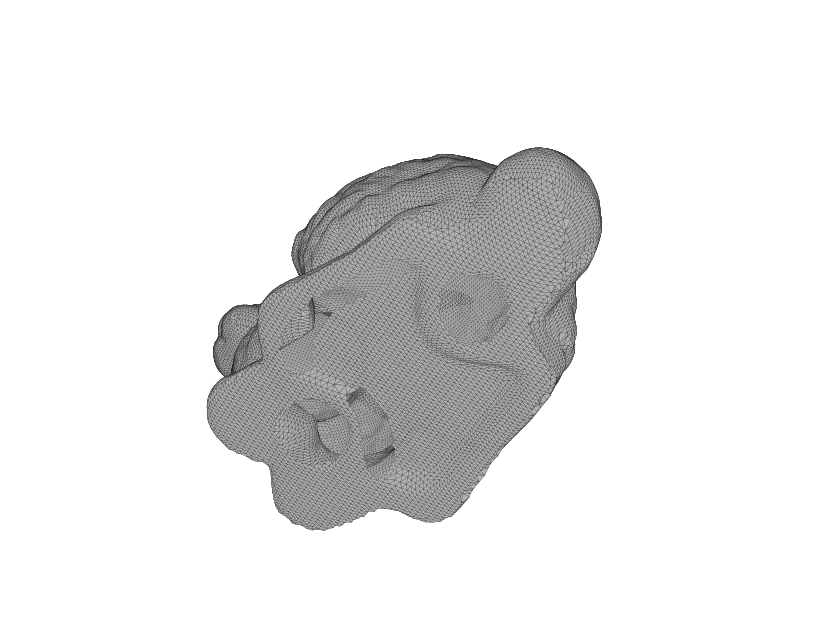

In [4]:
viewer = Viewer(800, 600)
viewer.lookat(1, -4, 1, 0, 0, 0, 0, 1, 0)
viewer.perspective(45, viewer.aspect, 1, 100)
viewer.mesh_visualization(mesh)

## Hole filling

In [5]:
# Freeze non-hole vertices
for i in range(mesh.num_vertices()):
    v = mesh.vertex(i)
    v.set_is_static(True)

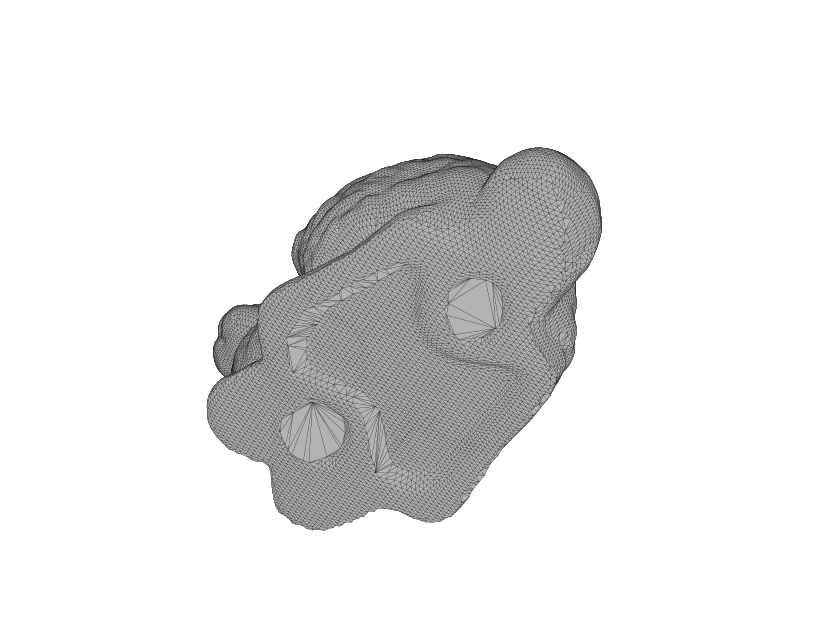

In [6]:
# Fill holes
hole_fill(mesh, np.pi / 6.0)
viewer.mesh_visualization(mesh)

## Remesh filled regions

In [7]:
remesh_triangular(mesh, short_length=0.5, long_length=2.0)

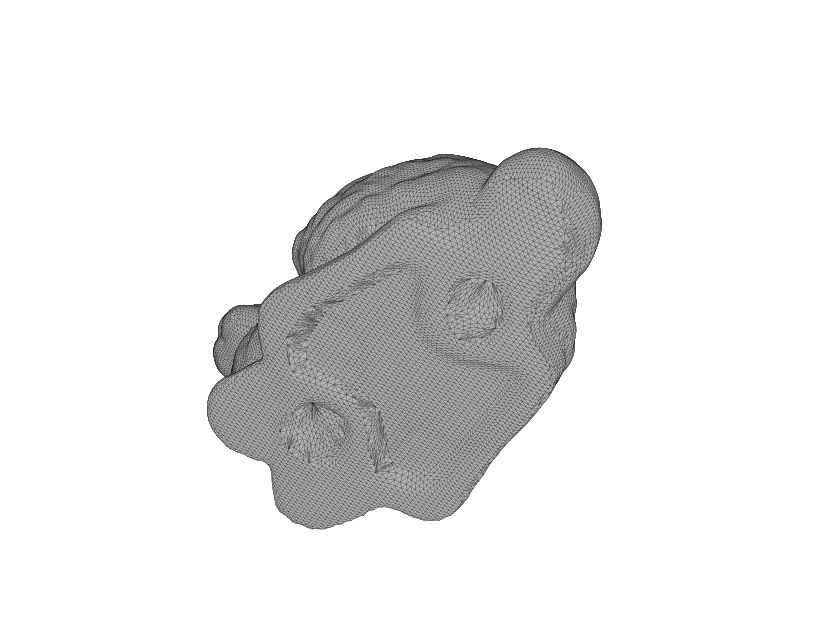

In [8]:
implicit_fairing(mesh)
viewer.mesh_visualization(mesh)